In [1]:
import os
import sys

In [2]:
if os.path.abspath('../src') not in sys.path:
    sys.path.insert(0, os.path.abspath('../src'))

In [3]:
from glob import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from counter import SilenceCounter

### Provide the directory to wav files

In [4]:
%ls ../

README.md    convert.sh*  env.yml      input_files/ notebooks/   src/


In [5]:
wav_directory = "../input_files/" # modify this to point to where the wav files are
wav_files = glob(os.path.join(wav_directory, "*.wav"))
print(wav_files)

['../input_files/邱郁慧 主任.wav', '../input_files/田春蘭老師.wav', '../input_files/戴育雯.wav', '../input_files/林怡芳老師.wav', '../input_files/林麗惠老師.wav', '../input_files/黃怡屏老師.wav', '../input_files/彭惠玉園長.wav', '../input_files/新錄音6.wav', '../input_files/戴瑋恒 老師.wav', '../input_files/王秀如老師.wav', '../input_files/林芷伶老師.wav', '../input_files/新錄音7.wav', '../input_files/新錄音5.wav', '../input_files/新錄音4.wav', '../input_files/新錄音3.wav', '../input_files/林芸竹 老師.wav', '../input_files/羅儀萱老師.wav', '../input_files/新錄音2.wav', '../input_files/林蔚君 老師.wav', '../input_files/新錄音3 (1).wav', '../input_files/黃懿芳 老師.wav', '../input_files/周佩瑩 老師.wav', '../input_files/李素美老師.wav', '../input_files/林保文園長.wav', '../input_files/鄧秀芸老師.wav', '../input_files/新錄音9.wav', '../input_files/曾鳳珠老師.wav', '../input_files/張淑娟老師.wav', '../input_files/吳玟瑾 老師.wav', '../input_files/彭惠英老師.wav', '../input_files/李美慧 老師.wav', '../input_files/李品儀老師.wav', '../input_files/王姿婷 老師.wav', '../input_files/新錄音.wav', '../input_files/李素貞老師.wav', '../input_files/徐瑤

### Calculate silence duration

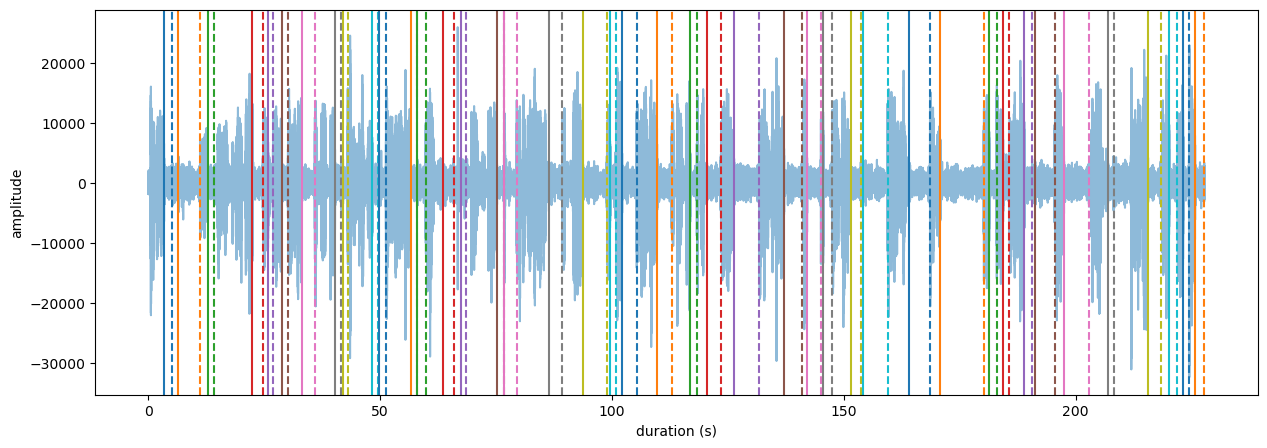

../input_files/王姿婷 老師.wav 111.02000000000007


In [14]:
min_silence_sec = 0.1 # modify this to change the minimum length of a silent duration
rel_silence_db_thresh = 10 # modify this to change the maximum relative DB considered as "silent"
i = 32

# try to do one and sanity check waveform
counter = SilenceCounter(wav_files[i])
silence_secs = counter.count(min_silence_sec=min_silence_sec, rel_silence_db_thresh=rel_silence_db_thresh,
                             visualize=True)
print(wav_files[i], silence_secs)

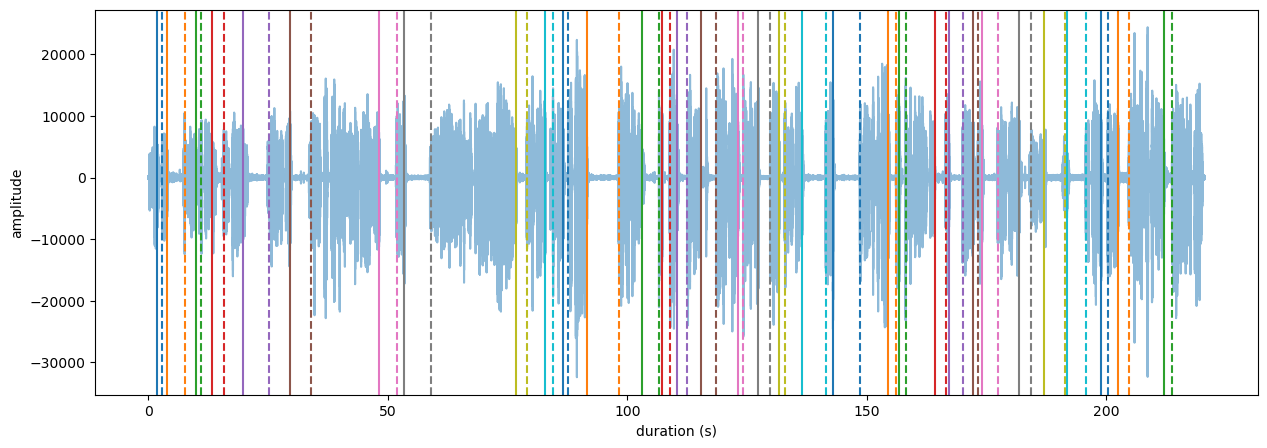

../input_files/邱郁慧 主任.wav 94.35899999999998


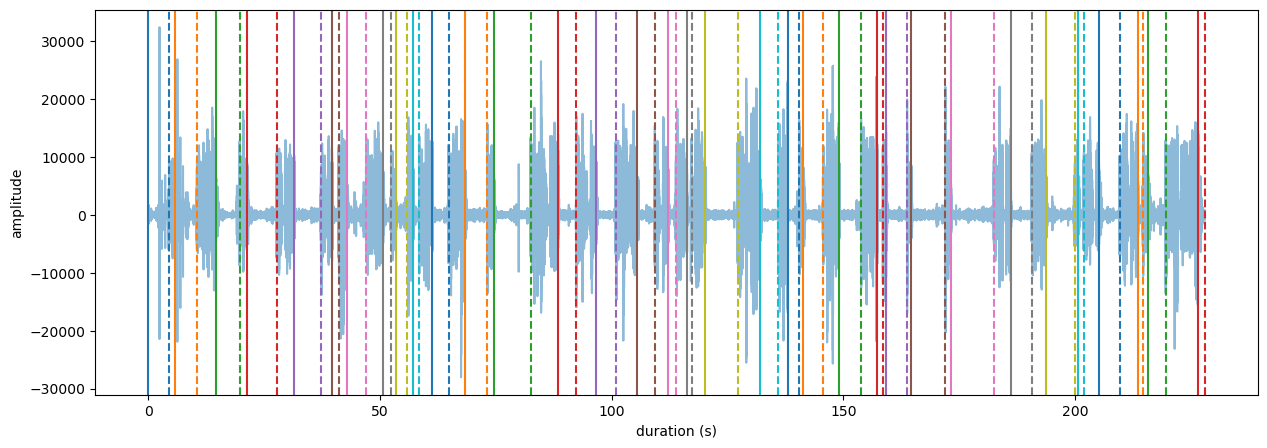

../input_files/田春蘭老師.wav 136.71199999999996


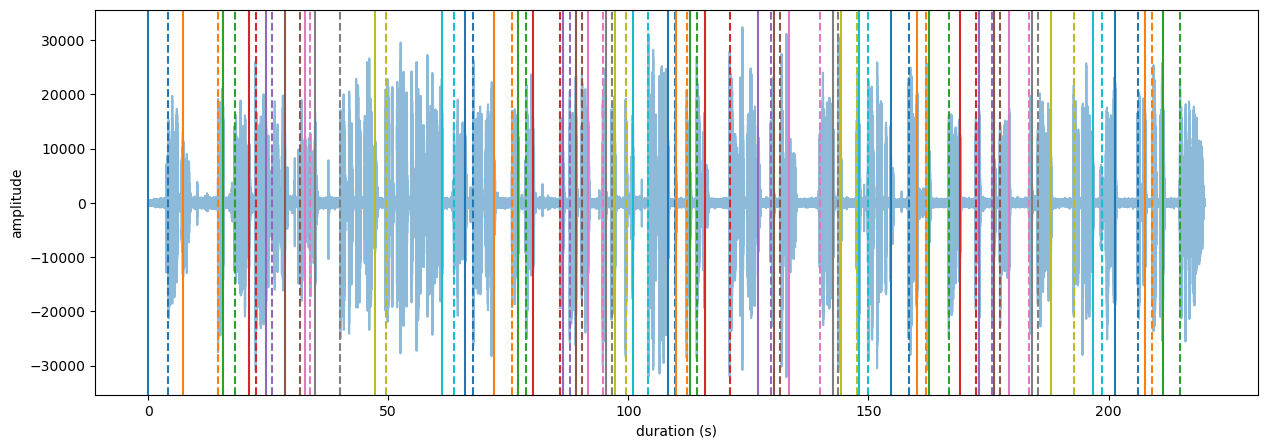

../input_files/戴育雯.wav 121.41899999999998


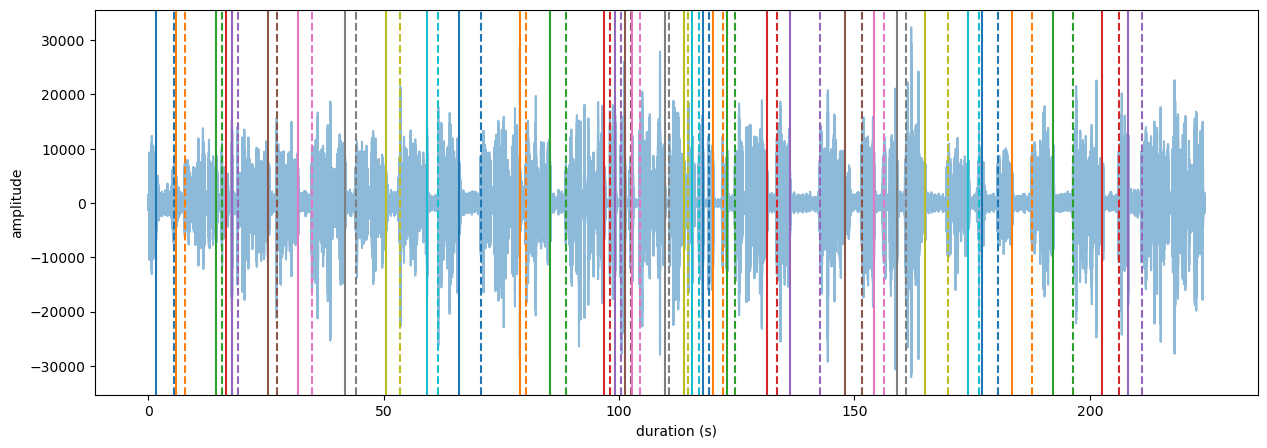

../input_files/林怡芳老師.wav 86.877


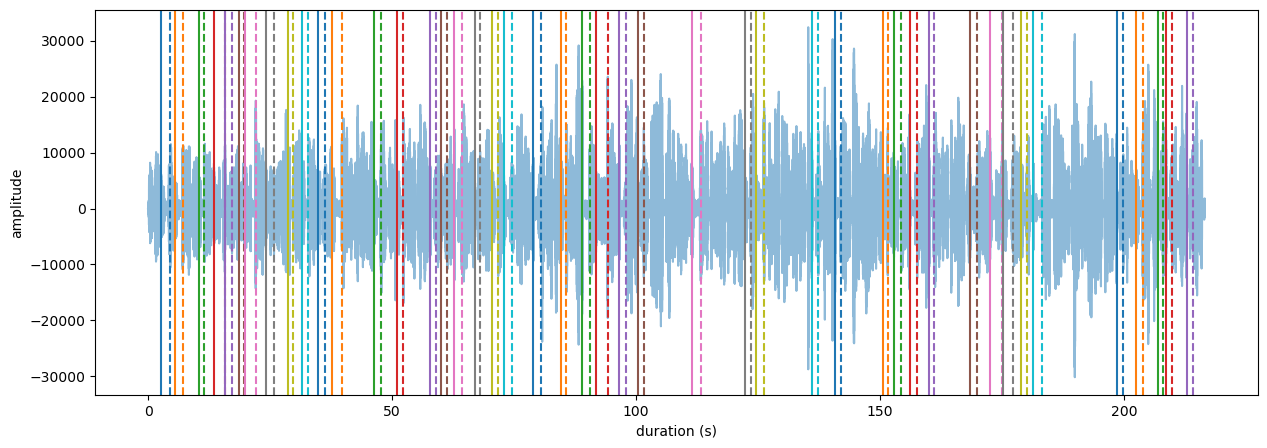

../input_files/林麗惠老師.wav 66.71899999999997


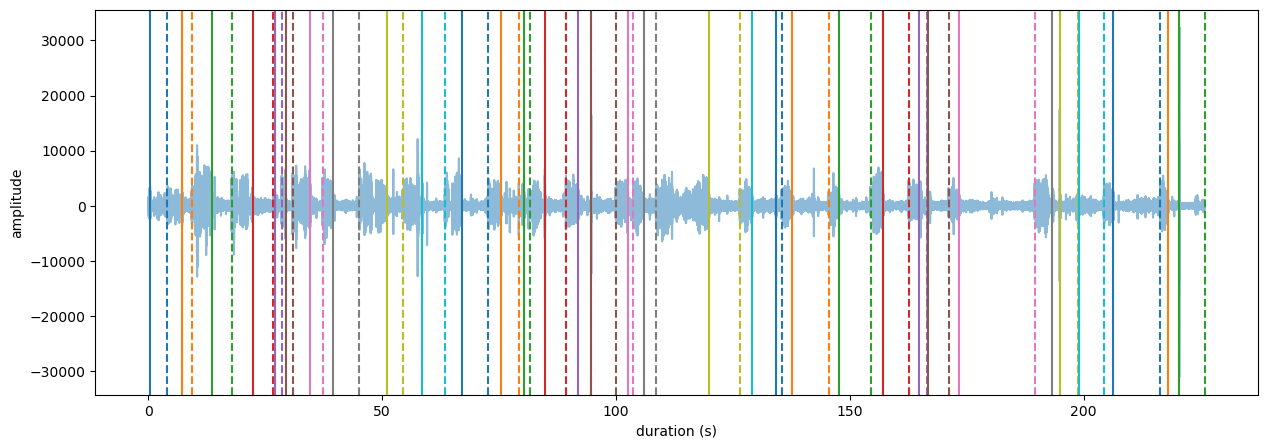

../input_files/黃怡屏老師.wav 145.42400000000004


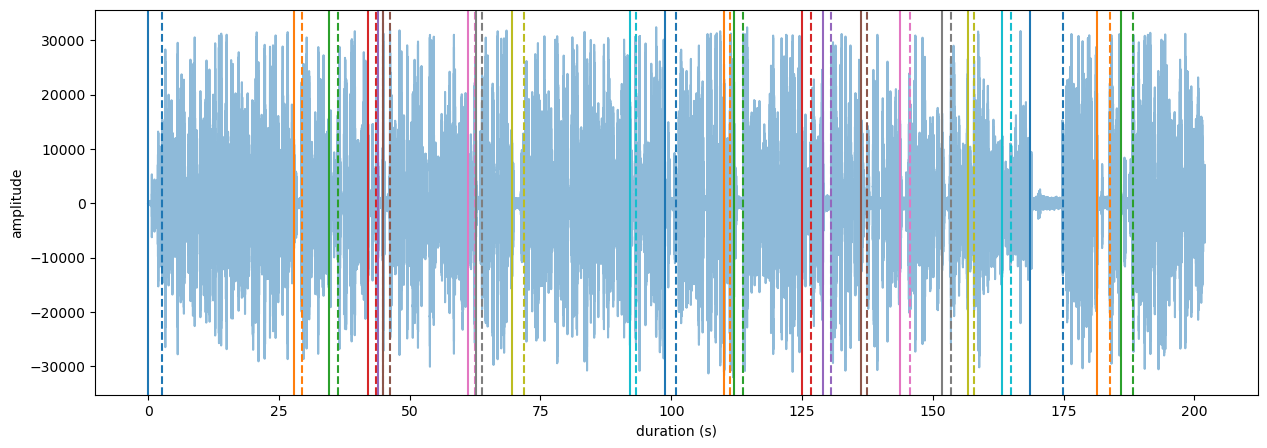

../input_files/彭惠玉園長.wav 42.729999999999976


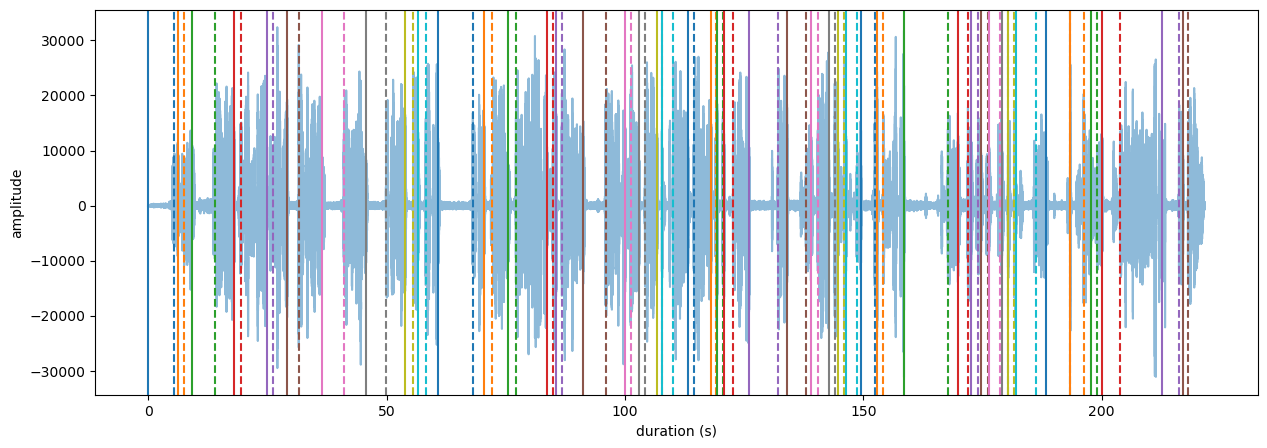

../input_files/新錄音6.wav 120.30299999999994


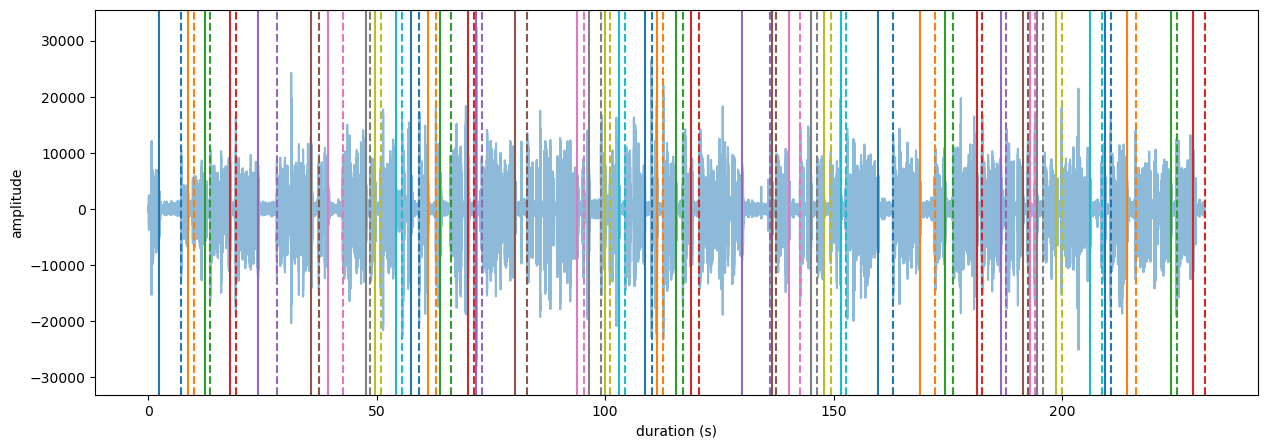

../input_files/戴瑋恒 老師.wav 84.63300000000002


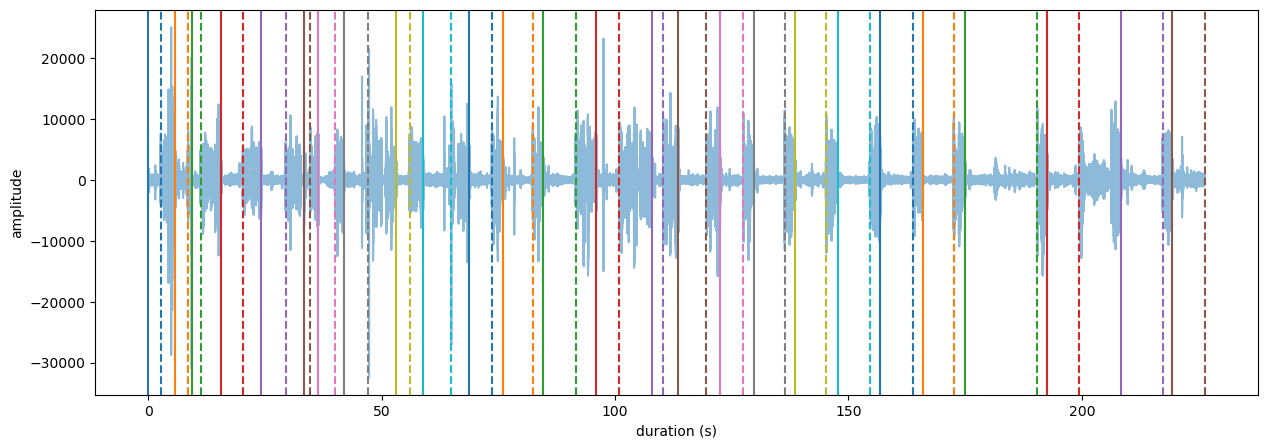

../input_files/王秀如老師.wav 145.06300000000002


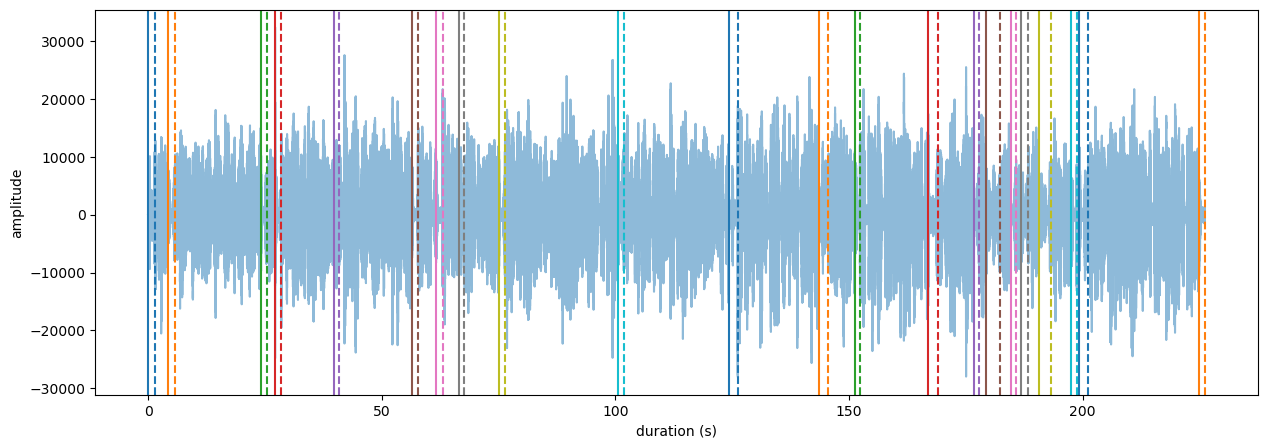

../input_files/林芷伶老師.wav 34.134999999999984


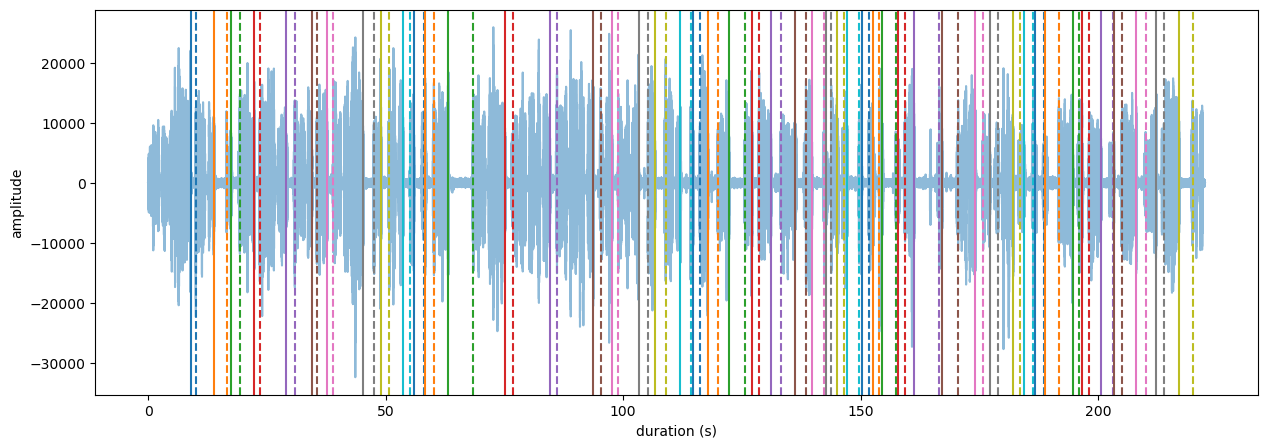

../input_files/新錄音7.wav 100.468


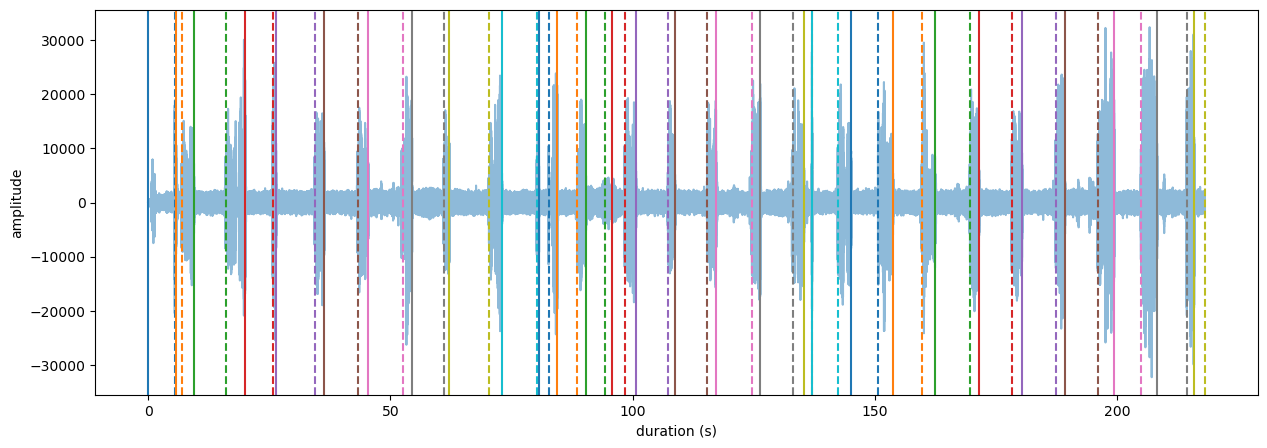

../input_files/新錄音5.wav 164.29399999999998


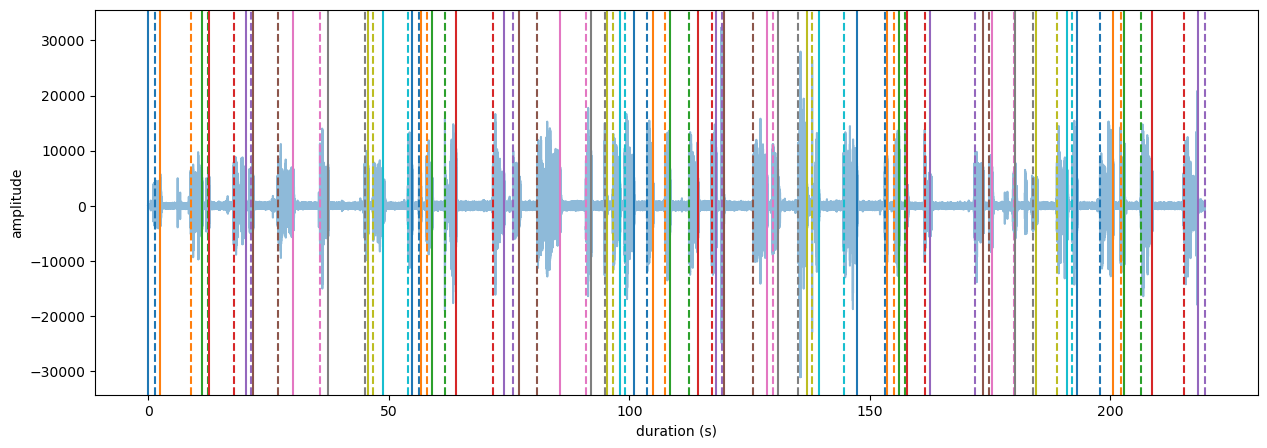

../input_files/新錄音4.wav 155.28900000000007


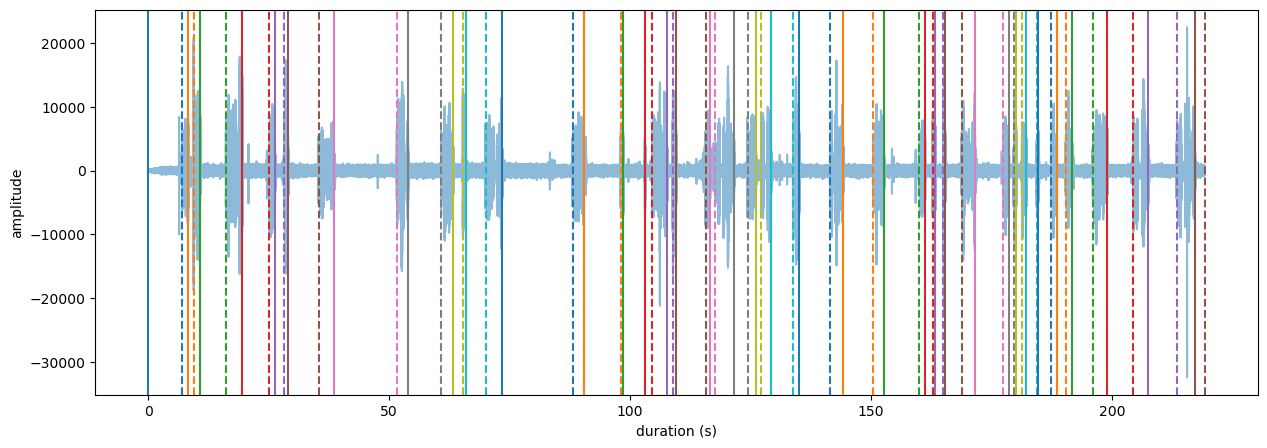

../input_files/新錄音3.wav 158.68899999999994


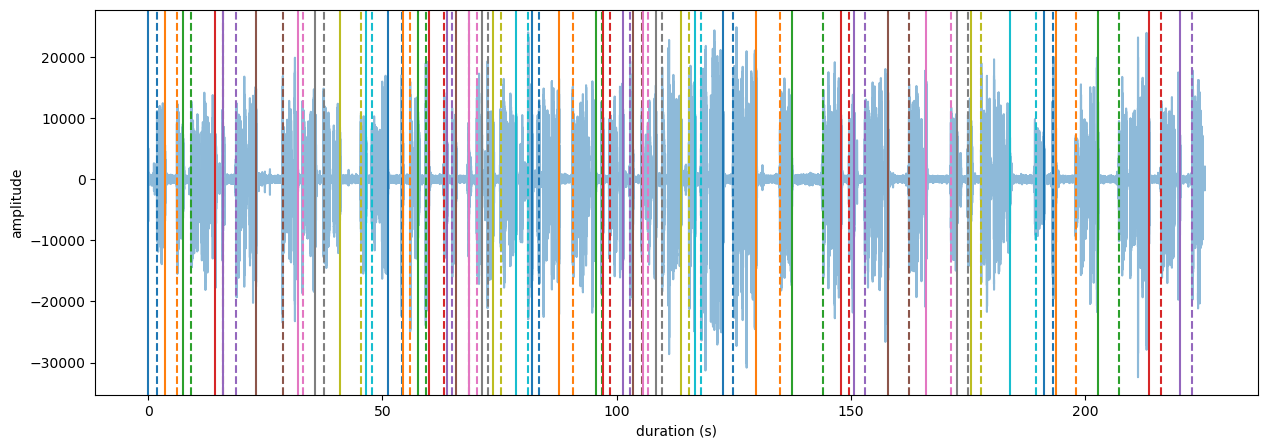

../input_files/林芸竹 老師.wav 116.01200000000006


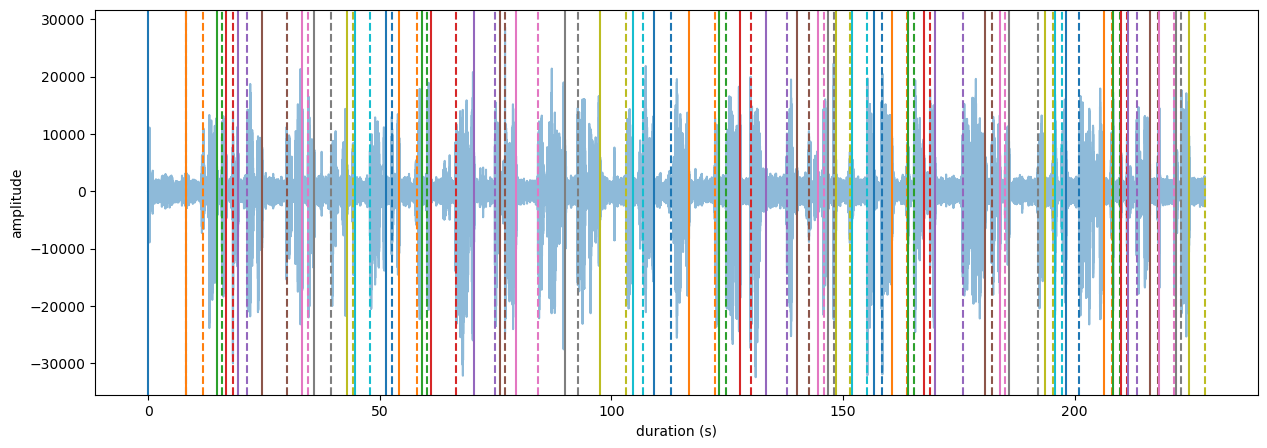

../input_files/羅儀萱老師.wav 137.56000000000003


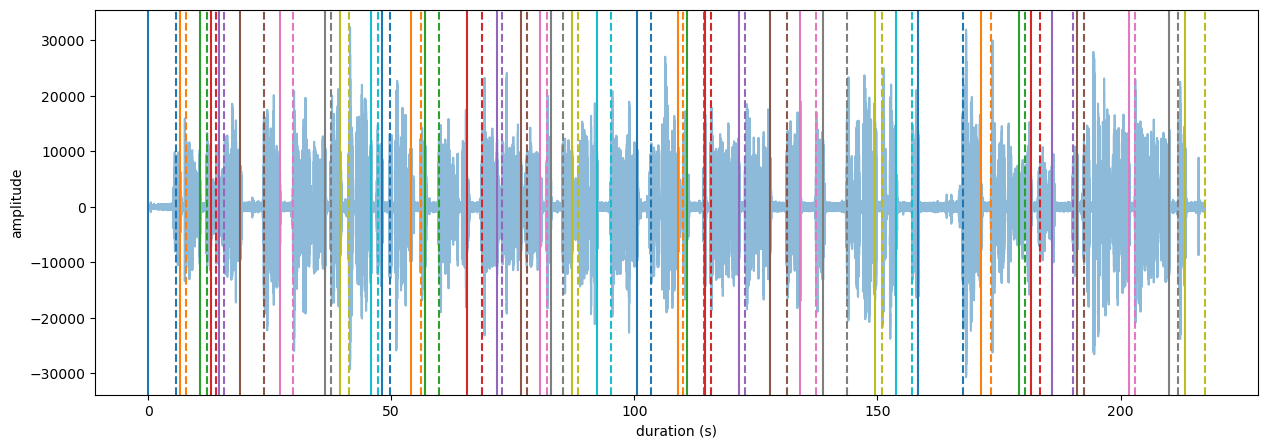

../input_files/新錄音2.wav 96.72599999999994


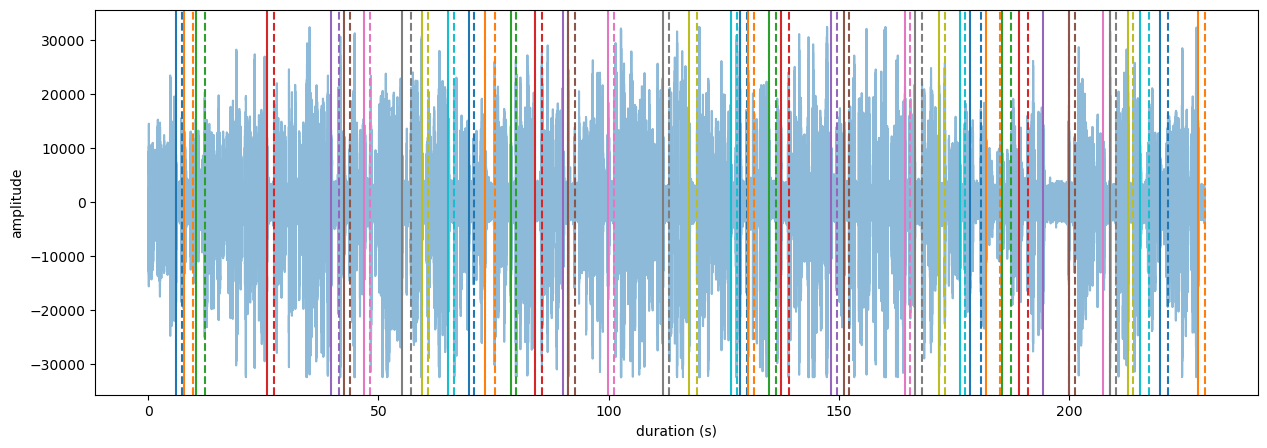

../input_files/林蔚君 老師.wav 67.99699999999999


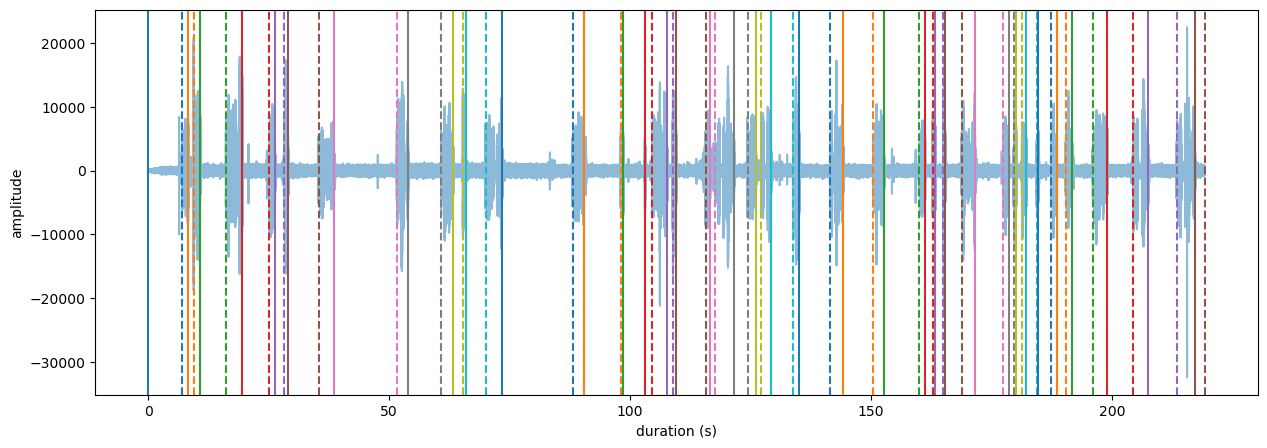

../input_files/新錄音3 (1).wav 158.68899999999994


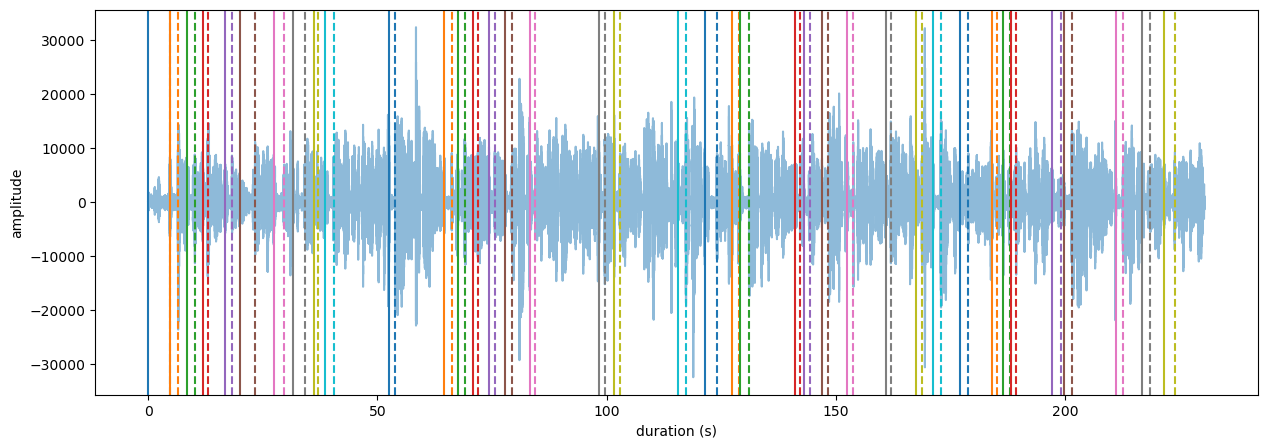

../input_files/黃懿芳 老師.wav 65.1169999999999


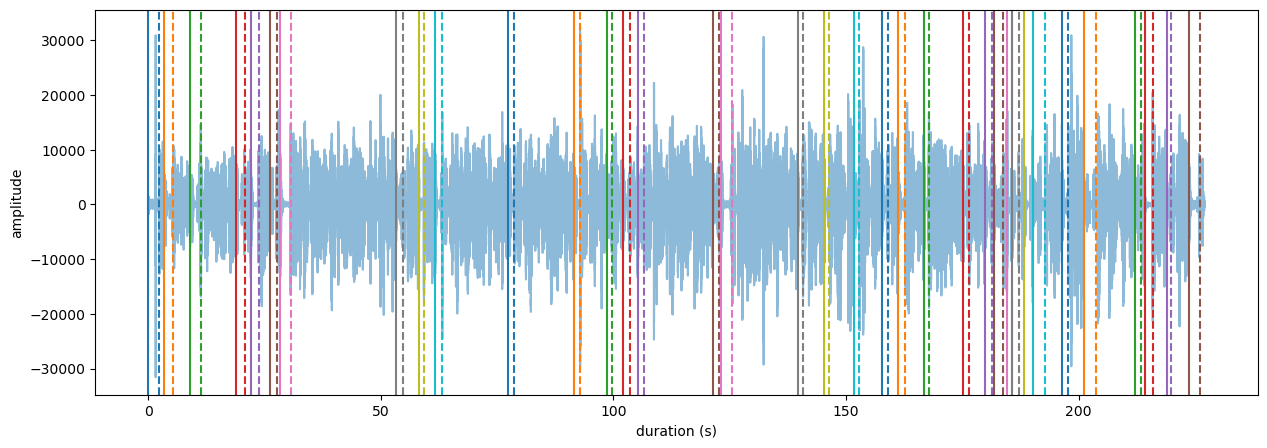

../input_files/周佩瑩 老師.wav 57.60299999999994


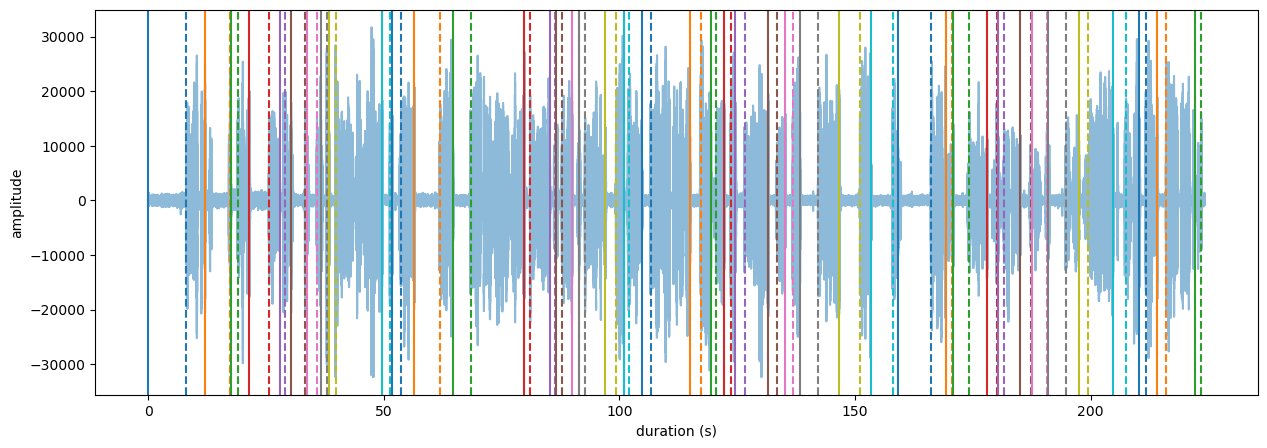

../input_files/李素美老師.wav 109.30100000000003


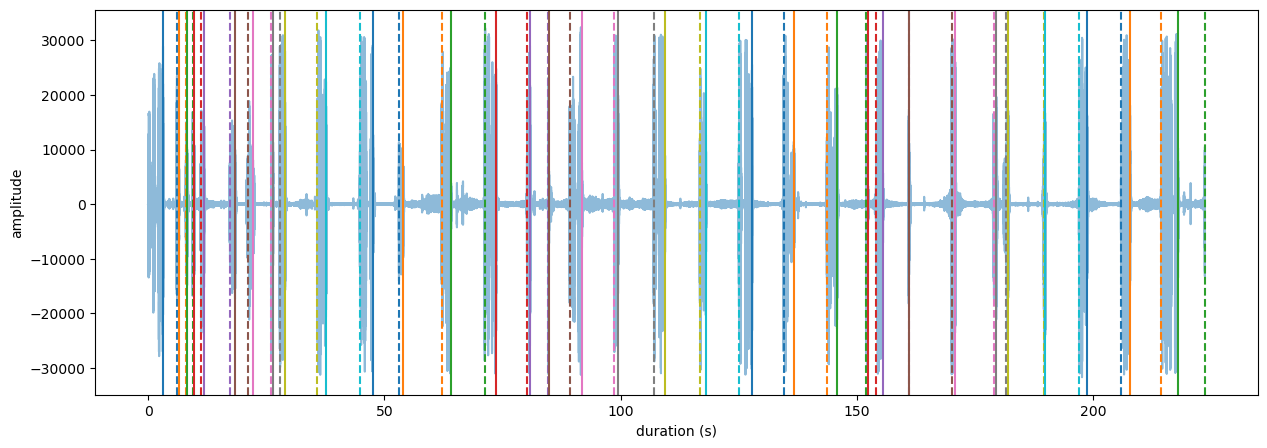

../input_files/林保文園長.wav 180.21199999999996


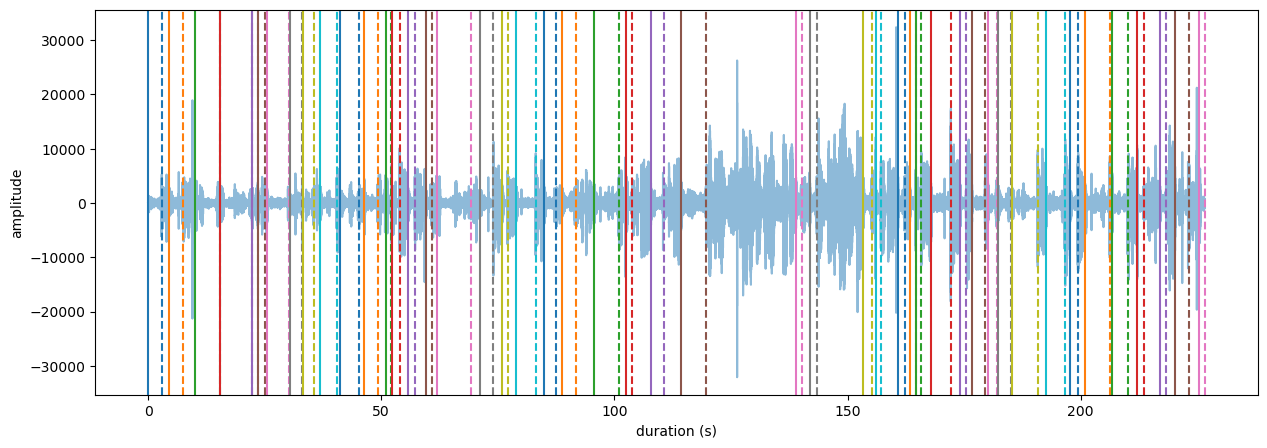

../input_files/鄧秀芸老師.wav 133.071


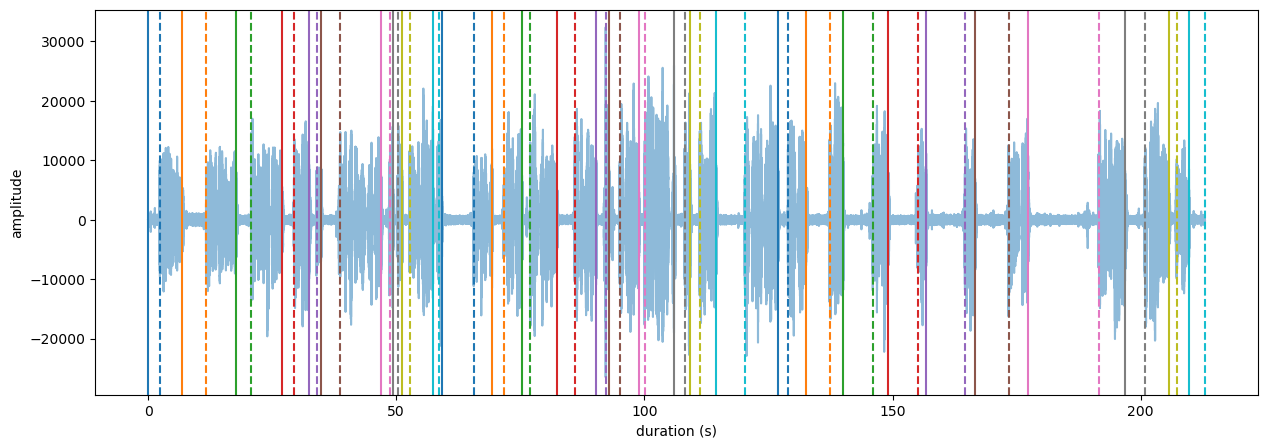

../input_files/新錄音9.wav 109.909


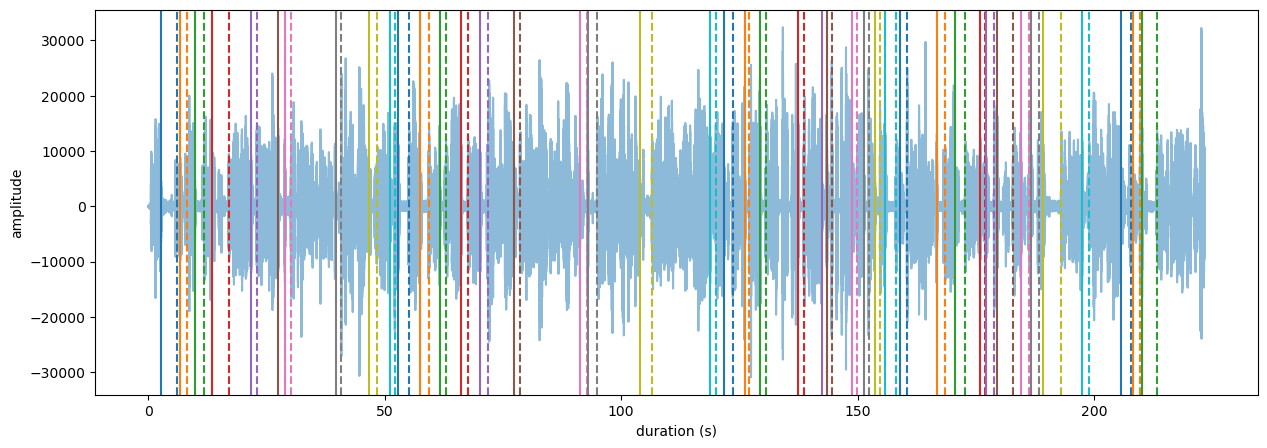

../input_files/曾鳳珠老師.wav 75.988


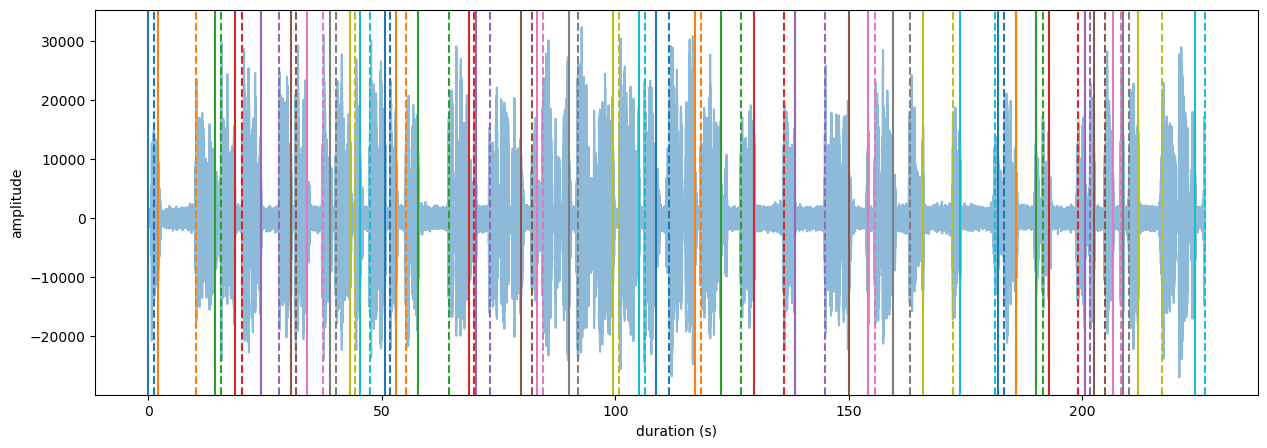

../input_files/張淑娟老師.wav 119.51199999999992


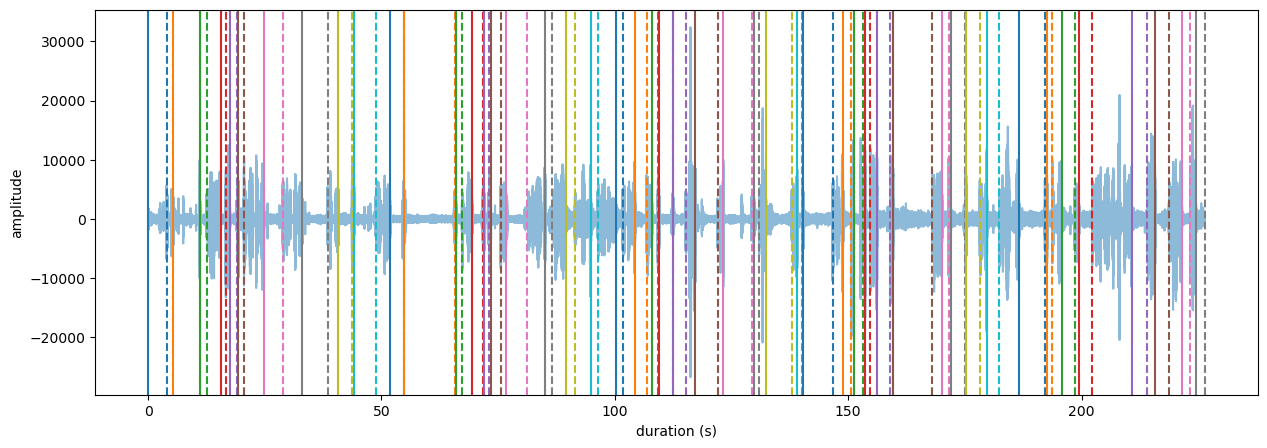

../input_files/吳玟瑾 老師.wav 146.76399999999995


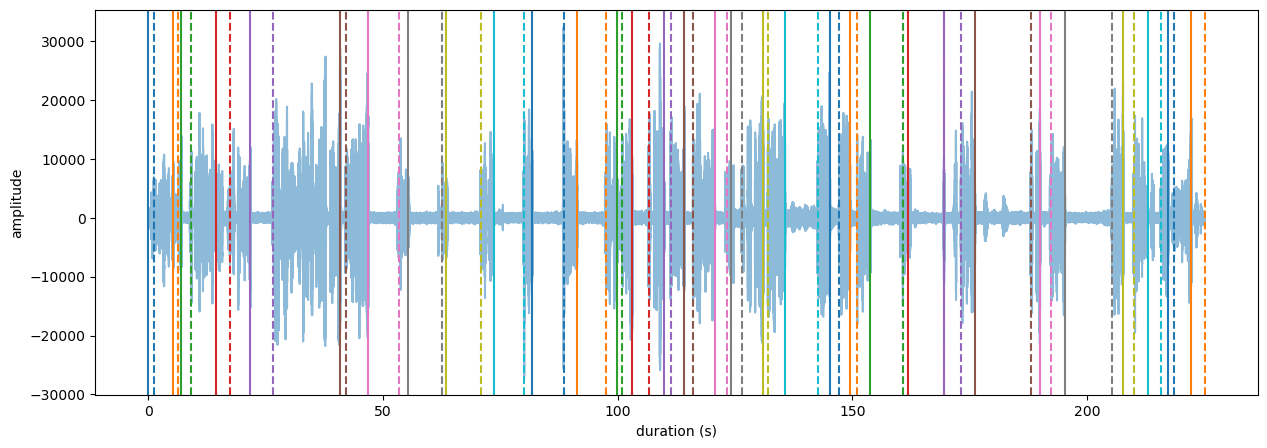

../input_files/彭惠英老師.wav 130.4050000000001


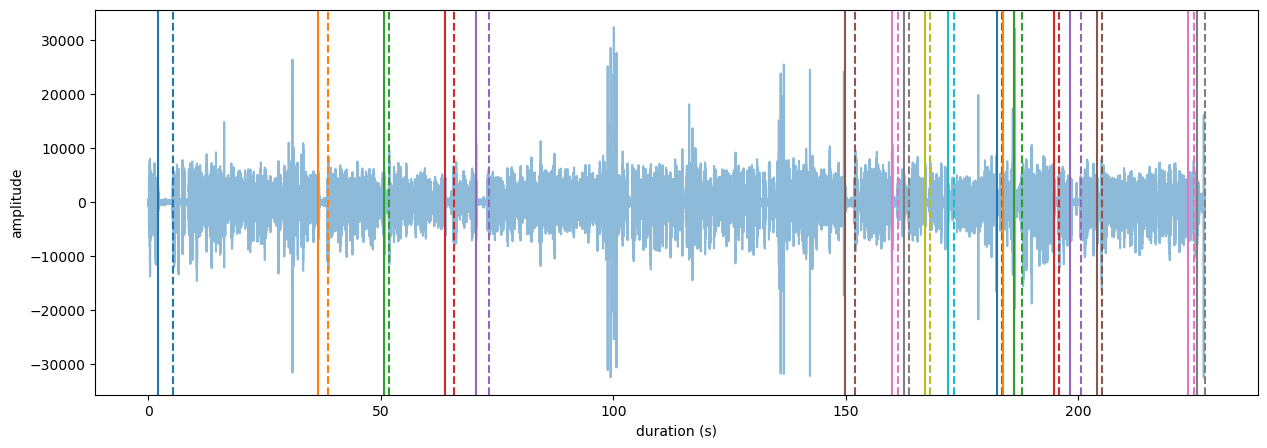

../input_files/李美慧 老師.wav 30.678000000000054


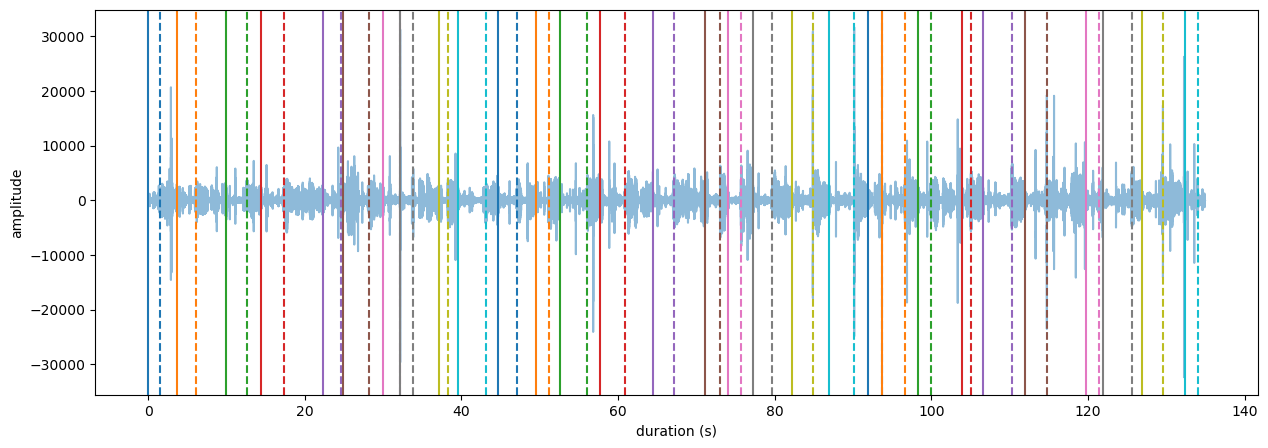

../input_files/李品儀老師.wav 72.656


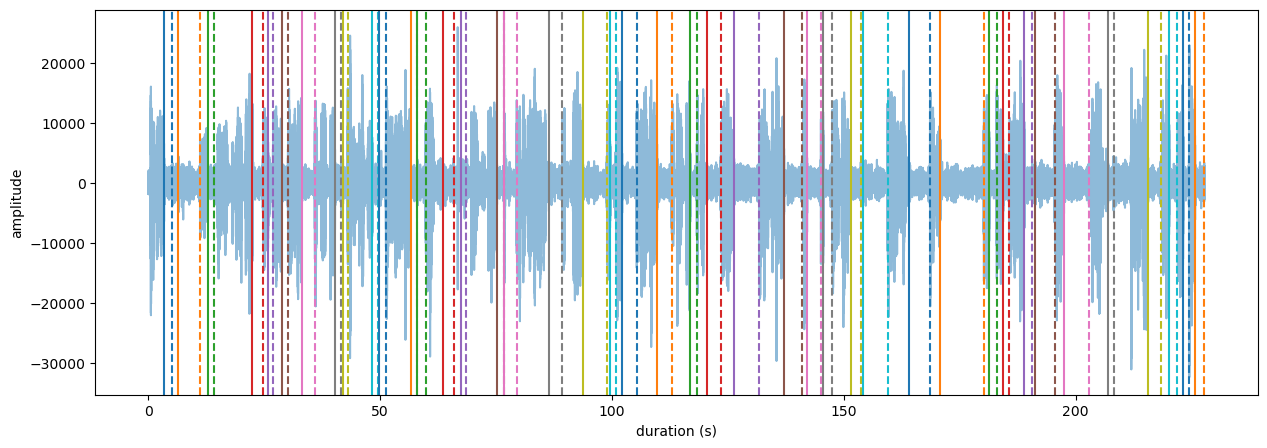

../input_files/王姿婷 老師.wav 111.02000000000007


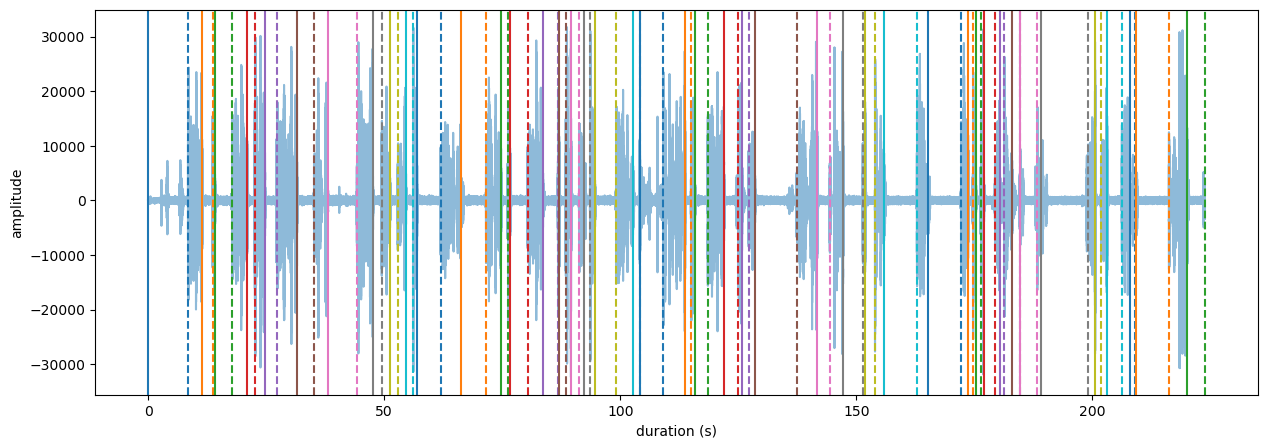

../input_files/新錄音.wav 146.41799999999995


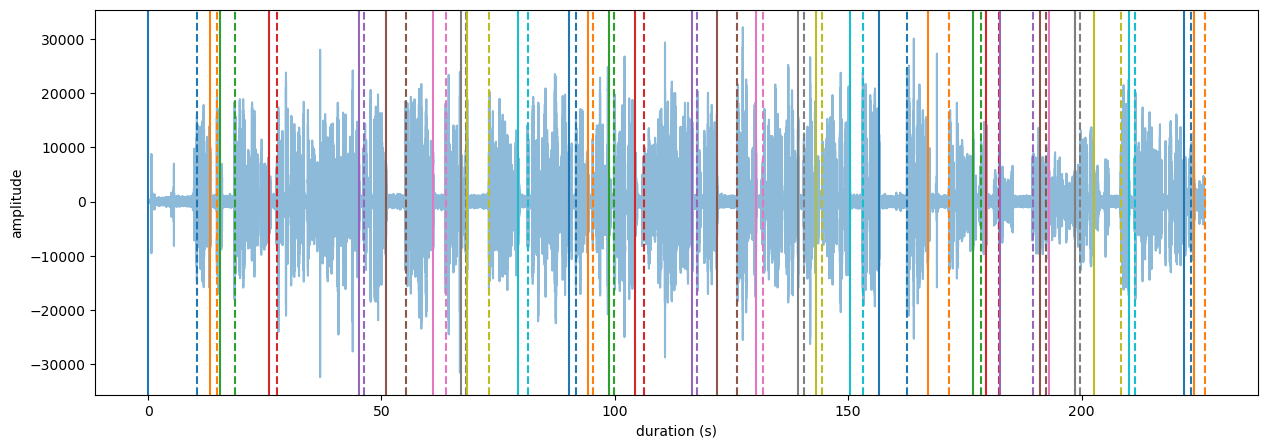

../input_files/李素貞老師.wav 92.31299999999995


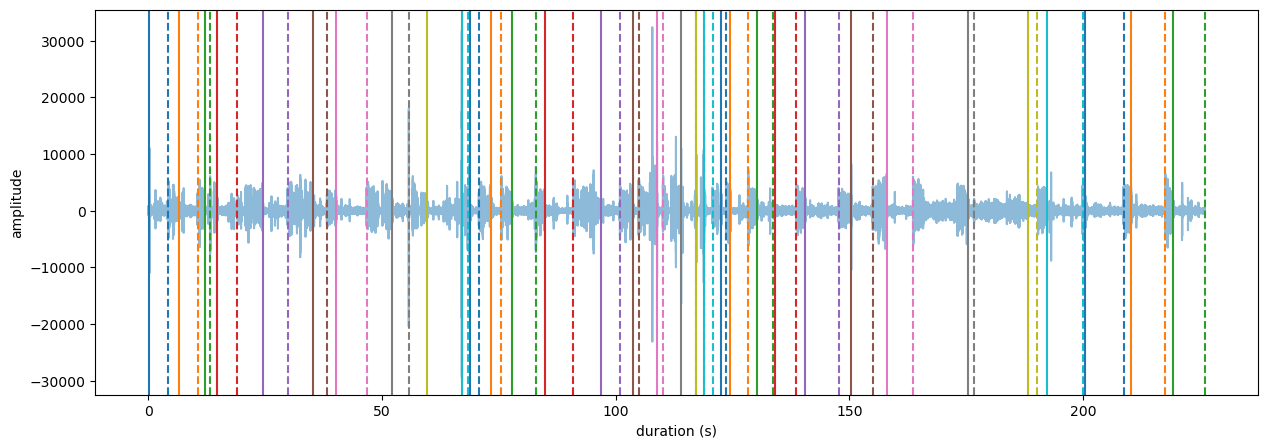

../input_files/徐瑤璇老師.wav 132.70100000000008


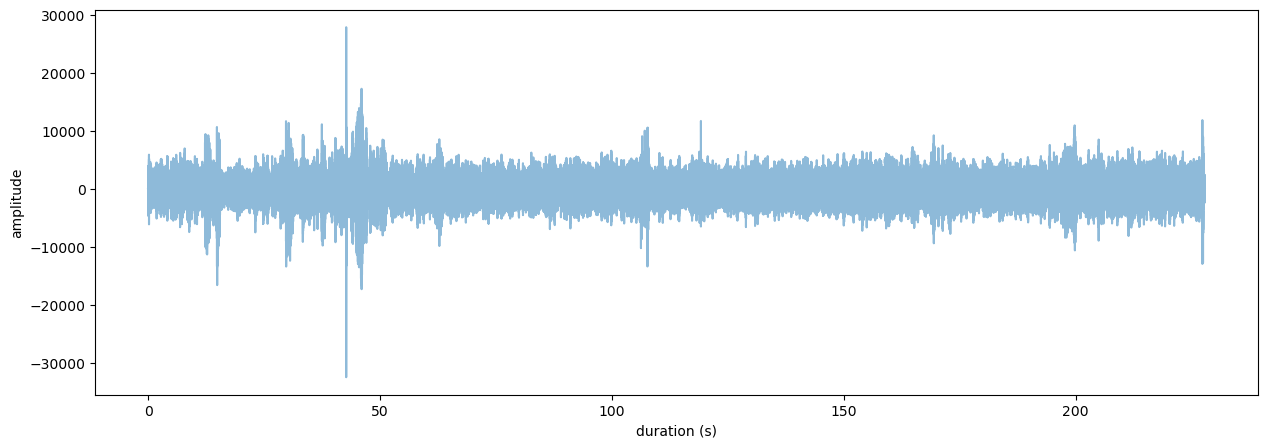

../input_files/廖紫君老師.wav 0


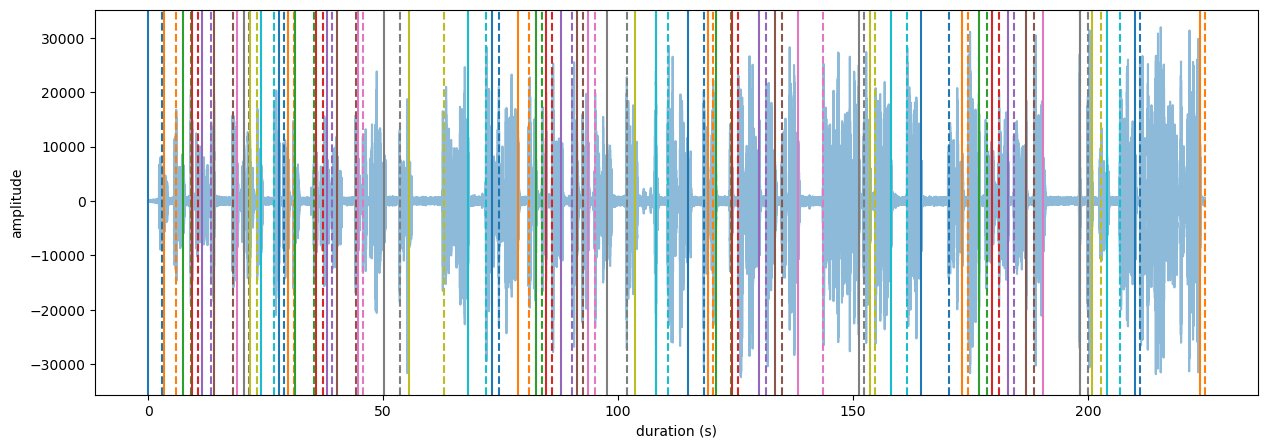

../input_files/新錄音10.wav 125.28899999999994


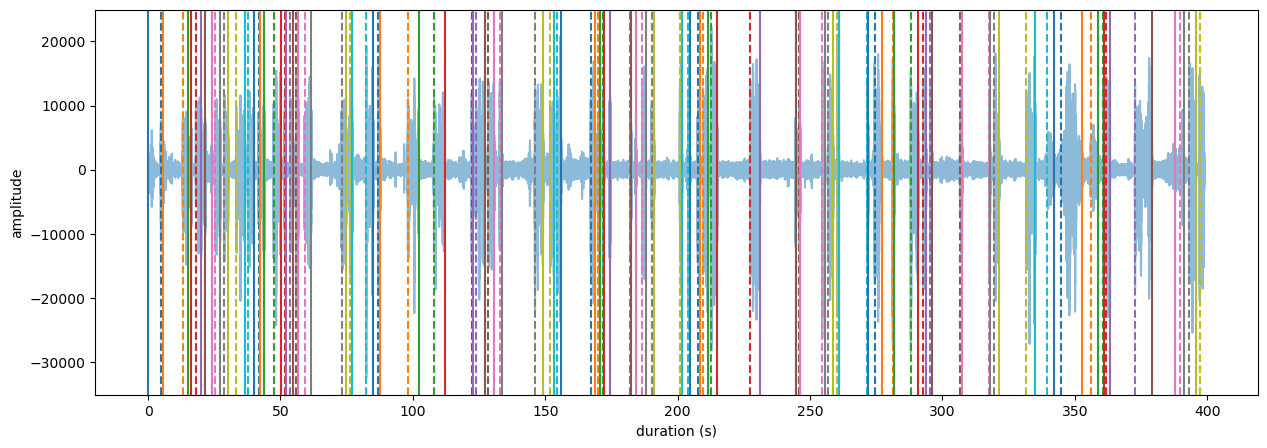

../input_files/鍾緣 老師.wav 288.45899999999983


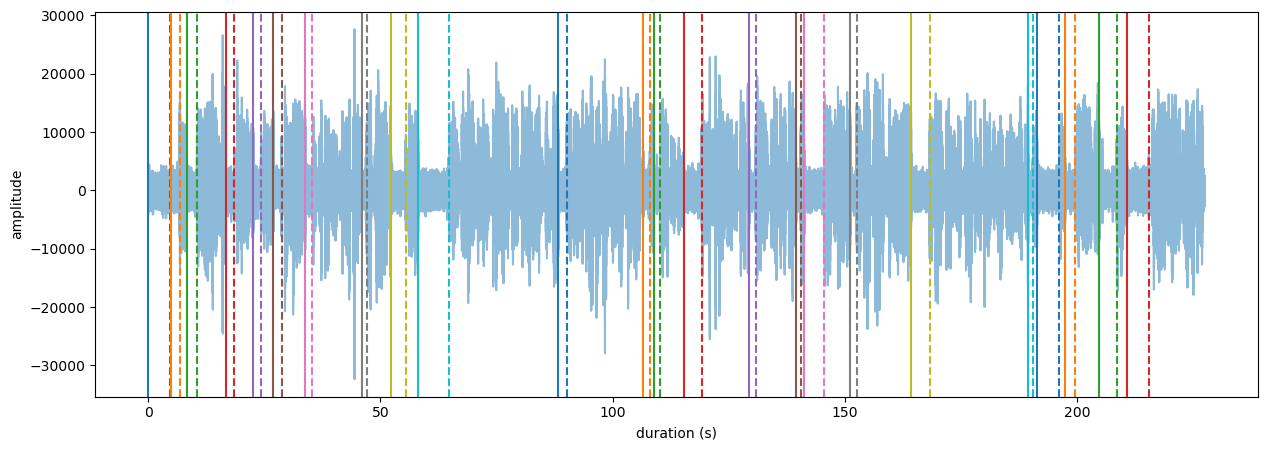

../input_files/陳聯正老師.wav 63.21400000000002


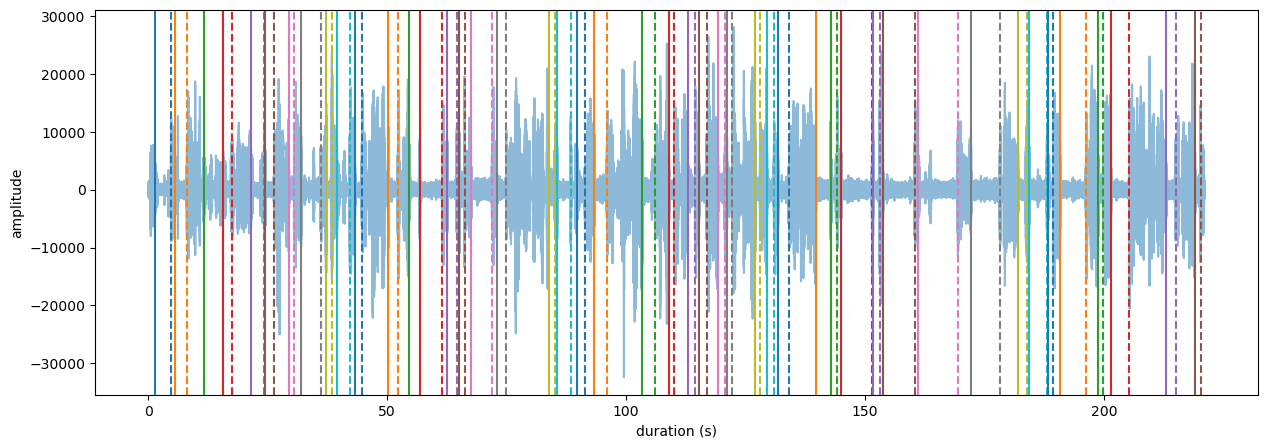

../input_files/李承鴻老師.wav 123.04399999999991


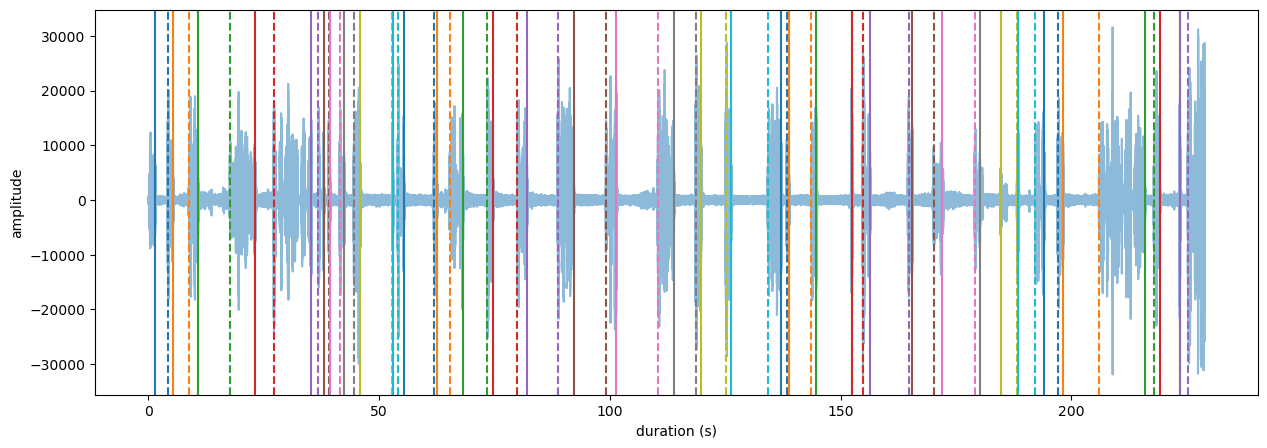

../input_files/王靜娟老師.wav 159.76400000000004


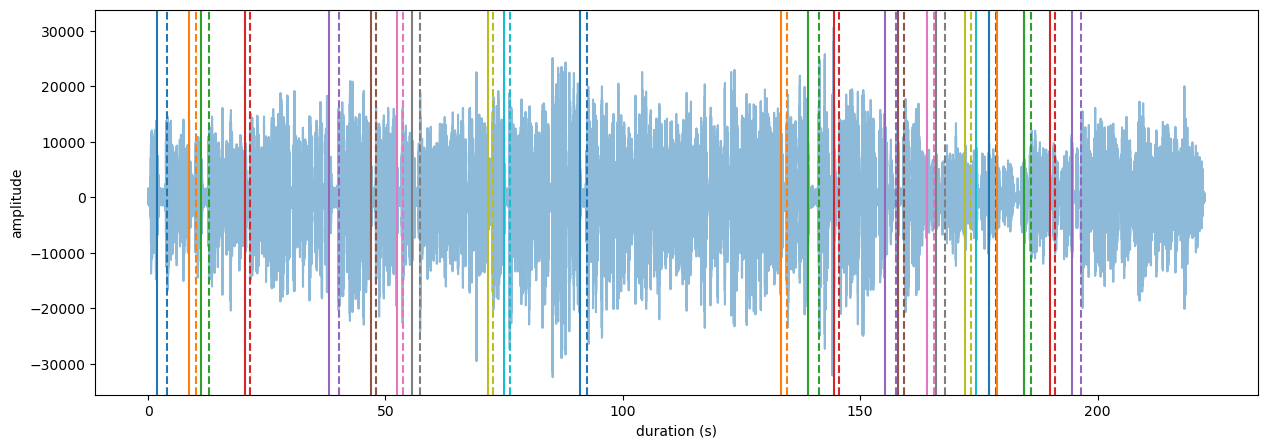

../input_files/傅碧杏 老師.wav 43.47600000000005


In [15]:
# if pass sanity check, continue with the rest
silence_durations = []

for wav_file in wav_files:
    counter = SilenceCounter(wav_file)
    silence_secs = counter.count(min_silence_sec=min_silence_sec, 
                                 rel_silence_db_thresh=rel_silence_db_thresh,
                                 visualize=True)
    print(wav_file, silence_secs)
    silence_durations.append(silence_secs)

### Save results into a CSV file

In [16]:
save_csv_filename = './silent_result.csv' # modify this to specify where to save the file

df = pd.DataFrame({'filename': [os.path.basename(f) for f in wav_files], 
                   'silent_secs': silence_durations})
df.to_csv(save_csv_filename, index=False)